# Projekt UMA 23L (Uczenie Maszynowe)

## Dokumentacja wstępna 

## Temat: Klasyfikacyjny las losowy

autor: Natalia Jaśkowska 



# 1. Temat projektu

Tematem projektu jest implementacja zmodyfikowanego algorytmu generowania lasu losowego klasyfikacji, gdzie do generowania kolejnych drzew wykorzystane są częściej elementy zbioru uczącego, na których model popełnia większe błędy.

# 1. Implementacja

Preferowanym językiem do realizacji zadania jest Python.Dla utworzenia pierwszego drzewa ze zbioru treningowego losowane jest k elementów. Przy kolejnych iteracjach las zostaje sprawdzony dla każdego rekordu ze zbioru treningowego i oznaczone zostają błędnie sklasyfikowane wiersze. Przy kolejnych losowaniach elementy błędnie zaklasyfikowane mają większą wagę (w pythonie funkcja random.choices(list, weights)). Drzewa będą tworzone zgodnie z algorytmem C4.5, powstałym z rozbudowanego ID3

# 1. Plan eksperymentów 

Porównane zostaną lasy losowe (oparte na algorytmie ID3 i C4.5) z ważeniem trudnych sampli lub nie, oraz sklearnowy Random Forest w kontekście złożoności czasowej i skuteczności przy pomocy metryk, m.in. krzywej ROC, confusion matrix, wzraz z szukanie optymalnych hiperparametrów.Eksperymentowanie z rozbalansowaniem datasetu treningowego i analiza wpływu tej procedury na wynik w zaleznosci od wazenia trudnych sampli (spodziewamy sie ze model prorytizyjacy trudne sample bedzie leprzy dla niezbalansowanych datasetow treningowych (w zalozeniu zbalandowanego datasetu walidacyjnego/testowego))

# 2. Opis algorytmów

## Drzewa decyzyjne (Decision Trees)

Drzewo decyzyjne jest rodzajem algorytmu uczenia nadzorowanego stosowanego w uczeniu maszynowym i eksploracji danych. Jest to graficzna reprezentacja procesu decyzyjnego, gdzie każdy wewnętrzny węzeł reprezentuje test na atrybucie, każda gałąź reprezentuje wynik testu, a każdy węzeł liścia reprezentuje decyzję lub etykietę klasy.

Drzewo decyzyjne to drzewo, w którym każdy:

- Węzeł - cecha (atrybut)
- Gałąź - decyzja (reguła)
- Liść - wynik (kategoryczny lub ciągły)

Drzewa decyzyjne mogą być wykorzystywane zarówno do zadań klasyfikacji, jak i regresji. W zadaniach klasyfikacji celem jest przewidzenie etykiety klasy dla danego wejścia, natomiast w zadaniach regresji celem jest przewidzenie ciągłej zmiennej wyjściowej.Algorytm drzewa decyzyjnego działa poprzez rekurencyjne dzielenie danych treningowych na podstawie wartości różnych atrybutów do momentu spełnienia kryterium zatrzymania. Algorytm wybiera atrybut, który zapewnia największy zysk informacyjny, który jest miarą zmniejszenia entropii lub nieczystości uzyskaną przez partycjonowanie danych w oparciu o ten atrybut. Po zbudowaniu drzewa można je wykorzystać do przewidywania nowych danych poprzez przejście od korzenia do węzła liścia, który odpowiada przewidywanej klasie lub wartości wyjściowej.

Drzewa decyzyjne mają kilka zalet, w tym prostotę, możliwość interpretacji i zdolność do obsługi zarówno danych kategorycznych, jak i numerycznych. Jednakże, mogą one być również podatne na overfitting, zwłaszcza jeśli drzewo jest zbyt głębokie lub jeśli dane treningowe są zaszumione. Istnieje kilka odmian drzew decyzyjnych, w tym random forest, gradient boosting i adaptive boosting, które mają na celu rozwiązanie niektórych z tych ograniczeń i poprawę wydajności algorytmów drzew decyzyjnych.



# 2.1 Algorytm ID3 (Iterative Dichotomiser 3)


MetodyAlgorytm ID3 rozpoczyna się od oryginalnego zbioru $ S $ jako węzła głównego (root node). W każdej iteracji algorytmu przechodzi przez każdy nieużywany atrybut zbioru $S$ i oblicza entropię $H(S)$ lub przyrost informacji $IG(S)$ tego atrybutu. Następnie wybiera atrybut, który ma najmniejszą wartość entropii (lub największy zysk informacyjny). Zbiór $S$ jest następnie dzielony lub partycjonowany przez wybrany atrybut, aby uzyskać podzbiory danych. (Na przykład, węzeł może być podzielony na węzły-dzieci na podstawie podzbiorów populacji, których wiek jest mniejszy niż 50, pomiędzy 50 a 100 i większy niż 100). Algorytm kontynuuje rekurencję na każdym podzbiorze, biorąc pod uwagę tylko atrybuty, które nie zostały wybrane wcześniej.

#### Kryterium Stopu
Rekursja na podzbiorze może się zatrzymać w jednym z tych przypadków:

1. Każdy element w podzbiorze należy do tej samej klasy, w takim przypadku węzeł jest zamieniany w węzeł liścia i oznaczany klasą przykładów.
2. Nie ma już więcej atrybutów do wybrania, ale przykłady nadal nie należą do tej samej klasy. W tym przypadku węzeł zostaje przekształcony w węzeł liścia i oznaczony najczęstszą klasą przykładów w podzbiorze.
3. Brak przykładów (samples) w podzbiorze, co ma miejsce, gdy w zbiorze macierzystym nie znaleziono przykładu pasującego do określonej wartości wybranego atrybutu. Przykładem może być brak osoby wśród populacji o wieku powyżej 100 lat. Następnie tworzony jest węzeł liściowy, który jest etykietowany najczęstszą klasą przykładów ze zbioru macierzystego.

W całym algorytmie budowane jest drzewo decyzyjne, w którym każdy węzeł nieterminalny (węzeł wewnętrzny) reprezentuje wybrany atrybut, na który zostały podzielone dane, a węzły terminalne (węzły liściowe) reprezentują etykietę klasy końcowego podzbioru tej gałęzi.

#### Podsumowanie ID3
1. Oblicz entropię każdego atrybutu $a$ zbioru danych $S$.
2. Dokonaj podziału ("split") zbioru $S$ na podzbiory za pomocą atrybutu, dla którego wynikowa entropia po podziale jest minimalna lub, równoważnie, zysk informacyjny jest maksymalny.
3. Utwórz węzeł drzewa decyzyjnego zawierający ten atrybut.
4. Rekursja na podzbiorach z wykorzystaniem pozostałych atrybutów.
    


#### Pseudokod

    ID3 (Examples, Target_Attribute, Attributes)
        Create a root node for the tree
        If all examples are positive, Return the single-node tree Root, with label = +.
        If all examples are negative, Return the single-node tree Root, with label = -.
        If number of predicting attributes is empty, then Return the single node tree Root,
        with label = most common value of the target attribute in the examples.
        Otherwise Begin
            A ← The Attribute that best classifies examples.
            Decision Tree attribute for Root = A.
            For each possible value, vi, of A,
                Add a new tree branch below Root, corresponding to the test A = vi.
                Let Examples(vi) be the subset of examples that have the value vi for A
                If Examples(vi) is empty
                    Then below this new branch ad            Else below this new branch add the subtree ID3 (Examples(vi), Target_Attribute, Attributes – {A})
        End
        Return Root

#### Wnioski 

1. ID3 nie gwarantuje uzyskania optymalnego rozwiązania. Może zbiegać się do optimum lokalnego. Wykorzystuje on strategię zachłanną, wybierając lokalnie najlepszy atrybut do podziału zbioru danych w każdej iteracji.
2. ID3 może nadmiernie dopasować dane treningowe (overfitting). Aby uniknąć nadmiernego dopasowania, należy preferować mniejsze drzewa decyzyjne niż większe.
3. ID3 jest trudniejszy do zastosowania na danych ciągłych niż na danych faktoryzowanych (dane faktoryzowane mają dyskretną liczbę możliwych wartości, co ogranicza możliwe punkty rozgałęzienia). Jeśli wartości danego atrybutu są ciągłe, to istnieje wiele miejsc, w których można podzielić dane na ten atrybut, a poszukiwanie najlepszej wartości do podziału może być czasochłonne.

#### Metody na nadmierne dopasowanie

1. Jednym z powszechnych podejść do uniknięcia przepasania w drzewach decyzyjnych jest przycinanie drzewa po jego zbudowaniu. Przycinanie polega na usunięciu niektórych gałęzi lub poddrzew z drzewa, które nie zapewniają znaczącej poprawy dokładności.
2. Wczesne zatrzymanie. Zatrzymanie wzrostu drzewa po osiągnięciu pewnej głębokości lub złożoności. Można to zrobić poprzez ustalenie maksymalnej głębokości drzewa lub poprzez zastosowanie kryterium zatrzymania opartego na poprawie dokładności lub zysku informacyjnym.
3. Walidacja krzyżowa. Technika wydajności algorytmu uczenia maszynowego poprzez wielokrotne dzielenie danych na zbiory treningowe i testowe oraz uśrednianie wyników.
4. Ensemble methods, ideą metod zespołowych jest użycie grupy modeli, które indywidualnie są słabe, ale po połączeniu mogą wytworzyć bardziej dokładne i solidne przewidywanie.
5. Selekcja cech. Wybranie podzbioru najbardzije informacyjnych atrybutów do wykorzystania przy budowanie drzewa decyzyjnego w celu poprawienia generalizacji modelu

### Metryki ID3
#### **Entropia**
Entropia $H(S)$ jest miarą ilości niepewności w zbiorze (danych) $S$ (czyli entropia charakteryzuje zbiór (danych) $S$), wyrażana jest poniższym wzorem:

$H(S) = \sum_{x \in X} -p(x) \log_2{p(x)}$

Gdzie:
- $H(S)$ - Entropia zbioru $S$
- $p(x)$ - Stosunek liczby elementów w klasie $x$ do liczby elementów w zbiorze $S$ 
- $S$ - Bieżący zbiór danych, dla którego obliczana jest entropia
    - Zmienia się on na każdym kroku algorytmu ID3, albo na podzbiór poprzedniego zbioru w przypadku podziału na atrybut, albo na partycję "rodzeństwa" rodzica w przypadku, gdy rekurencja zakończyła się wcześniej.

Gdy $H(S)=0$, zbiór S jest doskonale sklasyfikowany (tzn. wszystkie elementy w $S$ należą do tej samej klasy).


W ID3 entropia jest obliczana dla każdego pozostałego atrybutu. Atrybut o **najmniejszej** entropii jest używany do podziału zbioru $S$ na tej iteracji.
Entropia w teorii informacji mierzy, ile informacji można uzyskać podczas pomiaru zmiennej losowej, jako taka może być również używana do określenia ilości, do której rozkład wartości wielkości jest nieznany. Stała wielkość ma zerową entropię, ponieważ jej rozkład jest doskonale znany. Natomiast zmienna losowa o rozkładzie jednostajnym (dyskretnie lub stale jednostajnym) maksymalizuje entropię. Dlatego im większa entropia w węźle, tym mniej informacji wiadomo o klasyfikacji danych na tym etapie drzewa, a zatem tym większy potencjał poprawy klasyfikacji w tym miejscu.

#### **Information gain**
Zysk informacyjny $IG(A)$ jest miarą różnicy w entropii od stanu przed do po podziale zbioru $S$ na atrybut $A$. Innymi słowy, o ile zmniejszyła się niepewność w zbiorze $S$ po podziale zbioru $S$ na atrybut $A$. Zysk informacyjny jest obliczany na podstawie poniższej właściwości:

$IG(S, A) = H(S) - H(S|A)$

Gdzie:

- $IG(S, A)$ - Zysk informacyjny na podstawie atrybutu $A$ i zboru danych $S$
- $H(S|A)$ - Entropia warunkowa $S$ dana atrybutem $A$

Entropia warunkowa: $H(S|A) = \sum_{t \in T} p(t) H(t)$

Gdzie:
- $T$ jest zbiorem wszystkich możliwych wartości atrybutu $A$, podzbiory utworzone z podziału zbioru $S$ przez atrybut $A$ takie, że $ S=\bigcup _{{t\in T}}t$
- $p(t)$ - Stosunek liczby elementów w $t$ do liczby elementów w zbiorze $S$ 
- $H(t)$ - Entropia podzbioru $t$

W ID3 zysk informacyjny może być obliczany (zamiast entropii) dla każdego pozostałego atrybutu. Atrybut z **największym** zyskiem informacyjnym jest używany do podziału zbioru $S$ na tej iteracji.

## Przykładowe obliczenia dla zbioru 'Car Evaluation'

Zbiór danych samochodu zawiera zmienne kategoryczne, takie jak np. kupno, drzwi, osoby, lug_boot, bezpieczeństwo i klasa. Dlatego OrdinalEncoder jest używany do kodowania tych zmiennych do danych numerycznych, aby mogły być użyte jako dane wejściowe dla algorytmu ID3.

In [49]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(URL, names=column_names)

encoder = preprocessing.OrdinalEncoder()

for column in data.columns:
    data[column] = encoder.fit_transform(data[column].values.reshape(-1, 1))

data_encoded = data
X = data_encoded.drop("class", axis=1)
y = data_encoded["class"]

Poniższy kod trenuje klasyfikator drzewa decyzyjnego przy użyciu entropii i stałego stanu losowego (random state) dla powtarzalności. Nastepnie używa walidacji krzyżowej z 5 folds'ami do oceny dokładności modelu, wypisuje wynik walidacji krzyżowej oraz średni wynik. Model jest potem dopasowywany do całego zbioru danych w celach wizualizacyjnych.

Funkcja `cross_val_score` automatycznie dzieli zbiór danych na zestawy treningowe i walidacyjne w oparciu o określoną liczbę fałd, w tym celu nie potrzeba definiowania funkcji `train_test_split` podczas uzywania `cross_val_score`.

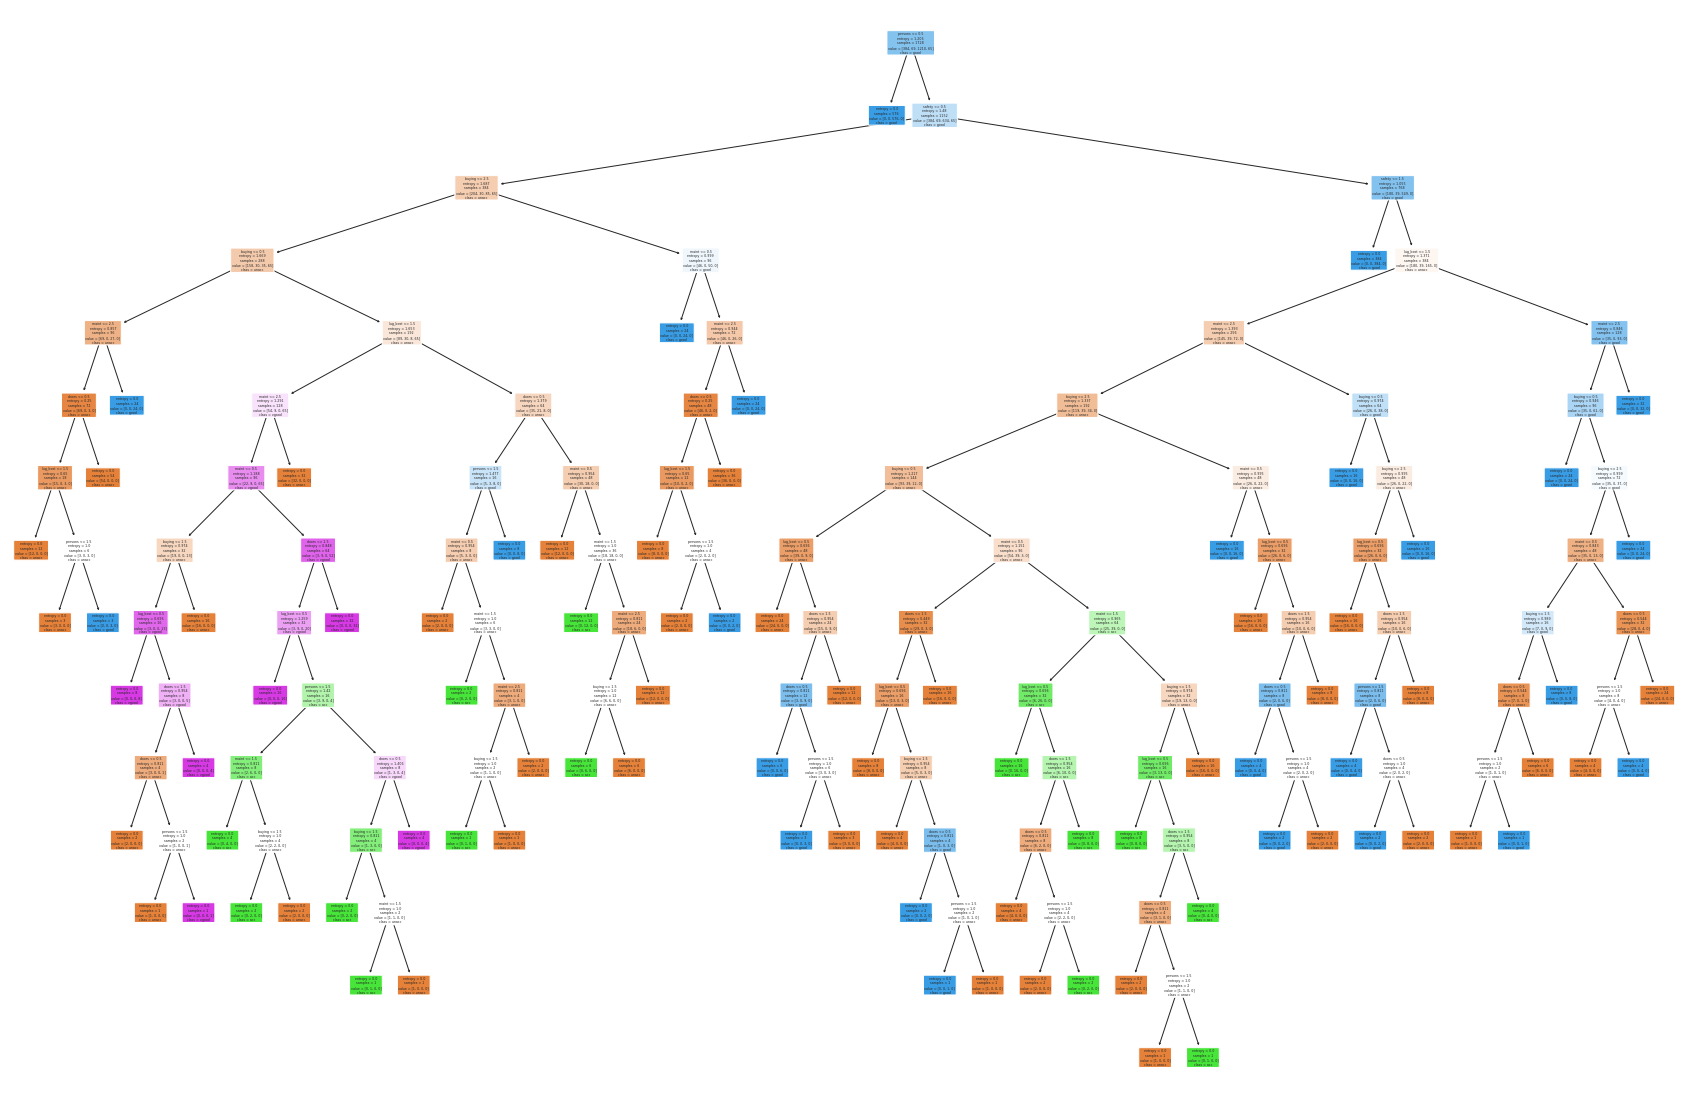

Cross-validation scores: [0.58959538 0.88150289 0.78901734 0.88405797 0.83768116]
Mean cross-validation score: 0.7963709474742398


In [51]:
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)

cv_scores = cross_val_score(dt_classifier, X, y, cv=5)

dt_classifier.fit(X, y)

plt.figure(figsize=(30, 20))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["unacc", "acc", "good", "vgood"], filled=True, rounded=True)
plt.show()

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

W celu poprawnej wizualizacji drzewo decyzyjne zostało ograniczone do głębokości 4 podczas procesu trenowania modelu.

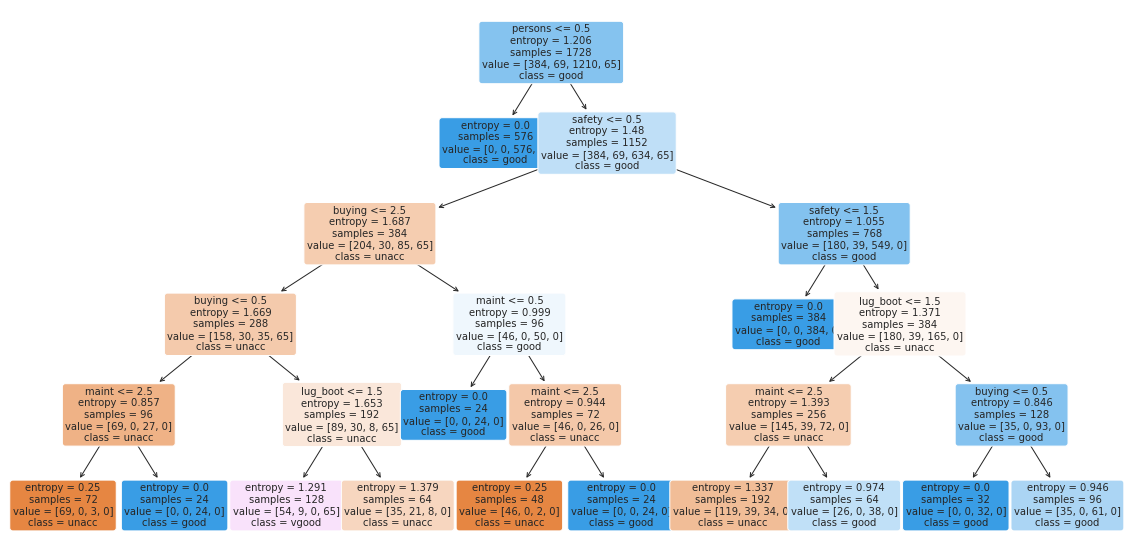

In [53]:
dt_classifier_limited = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_classifier_limited.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_limited, feature_names=X.columns, class_names=["unacc", "acc", "good", "vgood"], filled=True, rounded=True, fontsize=10)
plt.show()

Funkcja `entropy` oblicza entropię zmiennej docelowej `y`, natomiast funkcja `information_gain` oblicza zysk informacyjny przy podziale zmiennej docelowej y na dwa podzbiory y1 i y2. Zysk informacyjny jest różnicą pomiędzy entropią zbioru macierzystego a sumą ważoną entropii zbiorów dziecięcych.

In [54]:
import numpy as np

def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(y, y1, y2):
    parent_entropy = entropy(y)
    child_entropy = (len(y1) / len(y)) * entropy(y1) + (len(y2) / len(y)) * entropy(y2)
    return parent_entropy - child_entropy

In [55]:
def calculate_attribute_information_gain_and_entropy(X, y):
    """
    Calculates the information gain and entropy for each attribute in the feature matrix X.

    Parameters:
    X (pandas DataFrame): The feature matrix.
    y (pandas Series): The target variable.

    Returns:
    list of tuples: Each tuple contains the attribute name, information gain, and entropy.
    """
    results = []

    for attribute in X.columns:
        unique_values = X[attribute].unique()
        max_inf_gain = 0
        best_entropy = 0

        for value in unique_values:
            y_left = y[X[attribute] <= value]
            y_right = y[X[attribute] > value]

            inf_gain = information_gain(y, y_left, y_right)
            current_entropy = entropy(y_left) + entropy(y_right)

            if inf_gain > max_inf_gain:
                max_inf_gain = inf_gain
                best_entropy = current_entropy

        results.append((attribute, max_inf_gain, best_entropy))

    return results

In [57]:
results = calculate_attribute_information_gain_and_entropy(X, y)

df_entropy_and_infogain = pd.DataFrame(results, columns=["Attribute", "Information Gain", "Entropy"])

display(df_entropy_and_infogain)

,Attribute,Information Gain,Entropy
0,buying,0.041594,1.985545
1,maint,0.041594,1.985545
2,doors,0.004008,2.304588
3,persons,0.219225,1.479773
4,lug_boot,0.028112,2.216478
5,safety,0.113788,2.445686



Aby zbudować drzewo decyzyjne z podanego DataFrame'a, najpierw wybralibyśmy atrybut z największym zyskiem informacyjnym, który w tym przypadku to `persons` z zyskiem informacyjnym 0.208140. Ten atrybut dostarcza najwięcej informacji o zmiennej docelowej i dlatego jest najlepszym atrybutem do podziału. Następnie utworzylibyśmy nowy węzeł w drzewie decyzyjnym odpowiadający atrybutowi osoby.

Następnie utworzylibyśmy nowe poddrzewo dla każdej możliwej wartości atrybutu osoby. Na górze został przedstawiony przykład, gdzie splitujemy korzeń drzewa na dwa węzły (dwójka dzieci), używając kryterium <= oraz >, w celu ułatwienia zadania.

Powtarzalibyśmy ten proces rekurencyjnie dla każdego poddrzewa, aż do momentu spełnienia kryterium zatrzymania, np. gdy wszystkie przykłady w węźle liścia mają tę samą wartość docelową lub gdy głębokość drzewa przekroczy pewien próg.

#### Przykłady ręcznych obliczeń

Dla uproszczenia rozważymy tylko dwa atrybuty (`buying` i `safety`) i tylko niewielką część zbioru danych:


In [58]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=column_names)
data_subset = data.loc[:, ['buying', 'safety', 'class']]
data_subset

,buying,safety,class
0,vhigh,low,unacc
1,vhigh,med,unacc
2,vhigh,high,unacc
3,vhigh,low,unacc
4,vhigh,med,unacc
...,...,...,...
1723,low,med,good
1724,low,high,vgood
1725,low,low,unacc
1726,low,med,good


In [59]:
buying_counts = data['buying'].value_counts()
print(buying_counts)

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64


In [60]:
class_counts = data['class'].value_counts()
print(class_counts)

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [61]:
buying_use_count = (data['buying'] == 'use').sum()

# Count the number of occurrences of 'unacc' in the 'class' column for rows where 'buying' is 'use'
unacc_count = (data['class'][data['buying'] == 'use'] == 'unacc').sum()

print(f"Number of 'use' values in the 'buying' column: {buying_use_count}")
print(f"Number of 'unacc' values in the 'class' column where 'buying' is 'use': {unacc_count}")


Number of 'use' values in the 'buying' column: 0
Number of 'unacc' values in the 'class' column where 'buying' is 'use': 0


In [62]:
buying_class_counts = data.groupby(['buying', 'class']).size().reset_index(name='count')
print(buying_class_counts)

   buying  class  count
0    high    acc    108
1    high  unacc    324
2     low    acc     89
3     low   good     46
4     low  unacc    258
5     low  vgood     39
6     med    acc    115
7     med   good     23
8     med  unacc    268
9     med  vgood     26
10  vhigh    acc     72
11  vhigh  unacc    360


Aby obliczyć entropię i zysk informacyjny na podstawie dostarczonej tabeli, musimy najpierw obliczyć entropię kolumny klasy, a następnie obliczyć entropię każdej wartości w kolumnie `buying` w odniesieniu do kolumny klasy. Na koniec możemy obliczyć zysk informacyjny dla atrybutu kupowania.

Poszczególne kroki:

1. Oblicz entropię kolumny klasowej:

    - unacc: (324 + 258 + 268 + 360) / (72 + 15 + 324 + 0 + 89 + 46 + 258 + 39 + 92 + 23 + 268 + 26 + 72 + 0 + 360 + 0) = 1210 / 1728
   - acc: (72 + 89 + 92 + 72) / 1728 = 325 / 1728
   - good: (15 + 46 + 23) / 1728 = 84 / 1728
   - vgood: (0 + 39 + 26 + 0) / 1728 = 65 / 1728

   Entropy(class) = -[(1210/1728) * log2(1210/1728) + (325/1728) * log2(325/1728) + (84/1728) * log2(84/1728) + (65/1728) * log2(65/1728)] = 1.2034538774851895

2. Oblicz entropię każdej wartości w kolumnie `buying` w odniesieniu do kolumny `class`:

    - Entropy(high) = -[(324/432) * log2(324/432) + (108/432) * log2(108/432)] = 0.8112781244591328
   - Entropy(low) = -[(258/432) * log2(258/432) + (89/432) * log2(89/432) + (46/432) * log2(46/432) + (39/432) * log2(39/432)] = 1.570972123067498
   - Entropy(med) = -[(268/432) * log2(268/432) + (115/432) * log2(115/432) + (23/432) * log2(23/432) + (26/432) * log2(26/432)] = 1.4048953341952606
   - Entropy(vhigh) = -[(360/432) * log2(360/432) + (72/432) * log2(72/432)] = 0.6500224216483541


3. Oblicz zysk informacyjny dla atrybutu kupna:

   Information Gain(buying) = Entropy(class) - [(432/1728) * Entropy(high) + (432/1728) * Entropy(low) + (432/1728) * Entropy(med) + (432/1728) * Entropy(vhigh)] = 1.2034538774851895 - (0.2028195311147832 + 0.3927430307668745 + 0.35122383354881515 + 0.16250560541208853) = 0.0941618766426282






## 2.2 Algorytm C4.5

# 3. Zbiory danych 

## 3.1 Zbiór danych - Car Evaluation

Zbiór danych "Car Evaluation" zawiera informacje o ocenie samochodów, które zostały poddane badaniom. Zestaw danych zawiera 1728 wierszy i siedem kolumn. Każdy wiersz reprezentuje samochód, a każda kolumna reprezentuje jego atrybut. Dostępny zbiór danych jest powszechnie używany do testowania klasyfikatorów i algorytmów. 

Zmienną docelową zbioru danych jest ocena, która jest sklasyfikowana w czterech kategoriach: unacc (nieakceptowalna), acc (akceptowalna), good oraz vgood (bardzo dobra). Kategorie te reprezentują jakość samochodu na podstawie kryteriów oceny.

Dostępny zbiór nie posiada danych brakujących.

Link do danych: "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

### Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(URL,names=col_names)

In [5]:
df.shape

(1728, 7)

Widzimy, że w zbiorze danych znajduje się 1728 instancji i 7 zmiennych.

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for buying:
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

Value counts for maint:
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

Value counts for doors:
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

Value counts for persons:
2       576
4       576
more    576
Name: persons, dtype: int64

Value counts for lug_boot:
small    576
med      576
big      576
Name: lug_boot, dtype: int64

Value counts for safety:
low     576
med     576
high    576
Name: safety, dtype: int64

Value counts for class:
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [9]:
df.info

<bound method DataFrame.info of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]>

#### Podsumowanie zmiennych:

1. W zbiorze danych znajduje się 7 zmiennych, a wszystkie zmienne mają kategoryczny typ danych.
2. Wartości odpowiednio kolumn to: `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` i `class`.
3. `class` jest zmienną docelową.

#### Missing values (brakujące wartości)

In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Widzimy, że w zbiorze danych nie ma brakujących wartości.

Następnie przeprowadzimy kodowanie etykiet dla zmiennych kategorycznych w zbiorze danych:

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

Ten kod utworzy wykres zliczający, aby wyświetlić rozkład różnych klas akceptowalności samochodów w zbiorze danych. Oś x zawiera etykiety klas (unacc, acc, good i vgood), a oś y pokazuje liczbę instancji dla każdej klasy. 

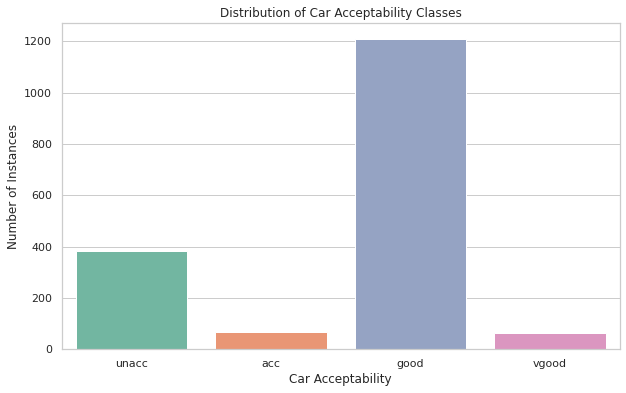

In [47]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', data=df, palette='Set2')
ax.set_xticklabels(["unacc", "acc", "good", "vgood"])
plt.xlabel("Car Acceptability")
plt.ylabel("Number of Instances")
plt.title("Distribution of Car Acceptability Classes")
plt.show()

##### Wnioski

- Zbiór danych jest niezrównoważony, przy czym klasa "good" (nieakceptowalna) ma znacznie więcej instancji niż inne klasy. Ten brak równowagi może wpłynąć na wydajność modelu, ponieważ może on być stronniczy w stosunku do klasy większościowej. Istotne jest, aby mieć to na uwadze podczas oceny modelu i rozważania potencjalnych technik rozwiązania problemu nierównowagi klas, takich jak ponowne próbkowanie lub użycie różnych metryk oceny.
- Klasa "unacc" (nieakceptowalna) ma drugą najwyższą liczbę instancji, ale nadal jest ona znacznie niższa niż klasa "good". Wskazuje to, że może być mniej przykładów, na podstawie których model może się uczyć, gdy rozróżnia samochody "good" i "unacc".
-  Klasy "acc" i "vgood" (bardzo dobre) mają najmniejszą liczbę instancji, co sprawia, że uczenie się przez model cech wyróżniających te klasy jest jeszcze trudniejsze. Może to prowadzić do słabych wyników podczas identyfikacji samochodów należących do kategorii "acc" i "vgood".

Aby poprawić nierównowagę klas można wprowadzić techniki przeciwdziałania nierównowadze, takie jak nadpróbkowanie klas mniejszościowych lub użycie różnych metryk oceny (np. F1-score, precyzja, recall lub obszar pod krzywą ROC), mogą pomóc w poprawieniu wydajności i uogólnienia modelu.

Kolejno zostały utworzone histogramy dla każdego atrybutu na podstawie kolumny klasy.

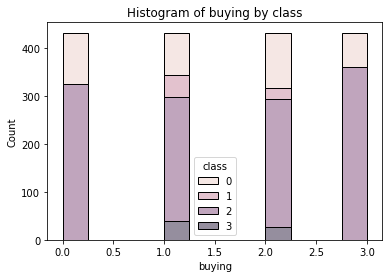

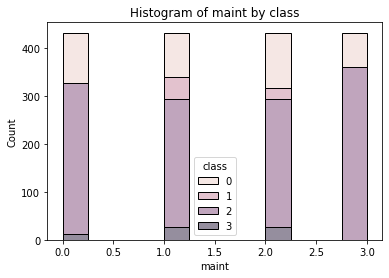

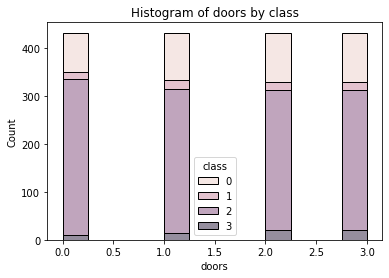

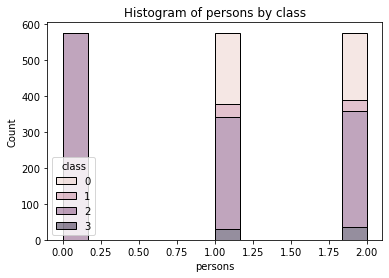

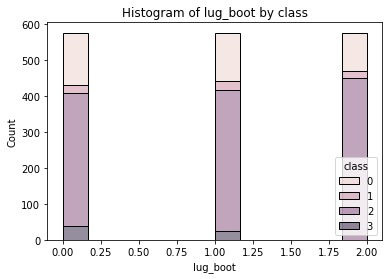

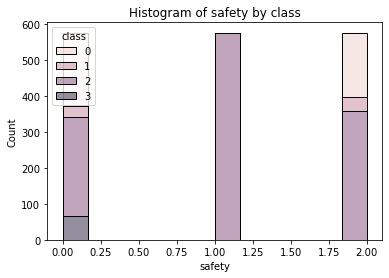

In [23]:
import matplotlib.pyplot as plt

for col in col_names[:-1]:  # Exclude the 'class' column
    plt.figure()
    sns.histplot(data=df, x=col, hue='class', multiple="stack", alpha=0.5)
    plt.title(f"Histogram of {col} by class")
    plt.show()

#### Wnioski

Na podstawie wykreślonych histogramów i wykresów zliczeń dla zbioru danych Car Evaluation możemy wyciągnąć następujące wnioski:

- Atrybut `class` jest niezrównoważony, ze znacznie większą liczbą instancji "unacc" (nieakceptowalnych) w porównaniu do instancji "acc" (akceptowalnych), "good" i "vgood" (bardzo dobrych). Może to prowadzić do tendencyjnych przewidywań, jeśli nie zajmiemy się tym podczas trenowania modelu.

- Atrybuty `buying` i `maint` (utrzymanie) wykazują podobne rozkłady w różnych klasach. Wyższe koszty zakupu i utrzymania są generalnie związane z większą liczbą nieakceptowalnych samochodów.

- Atrybut `safety` wykazuje wyraźny wzór, z większą liczbą nieakceptowalnych samochodów w przypadku niższych ocen bezpieczeństwa. Samochody o wysokich wskaźnikach bezpieczeństwa są zazwyczaj akceptowalne lub lepsze.

- Atrybuty `doors`, `persons` i `lug_boot` wykazują mniej wyraźne wzorce w ich związku z klasą docelową. Można jednak zauważyć, że samochody z mniejszą liczbą drzwi lub osób mają większy odsetek nieakceptowalnych przypadków.

Podsumowując, zbiór danych Car Evaluation wykazuje pewne wzorce, które mogą być przydatne w przewidywaniu akceptowalności samochodu. Najbardziej zauważalne zależności występują pomiędzy klasą a atrybutami `buying`, `maint` i `safety`. Jednakże, zbiór danych jest niezrównoważony i należy zwrócić uwagę na ten problem podczas trenowania modelu, aby uniknąć tendencyjnych przewidywań.

In [28]:
import pandas as pd

mean_values = df.groupby("class").mean()
std_dev = df.groupby("class").std()
variance = df.groupby("class").var()

summary_df = pd.concat([mean_values, std_dev, variance], axis=1, keys=["Mean", "Std Dev", "Variance"])
print(summary_df)

           Mean                                                     Std Dev  \
         buying     maint     doors   persons  lug_boot    safety    buying   
class                                                                         
0      1.393229  1.401042  1.585938  1.484375  0.898438  0.937500  1.085896   
1      1.333333  1.333333  1.565217  1.478261  0.956522  1.130435  0.474858   
2      1.548760  1.557025  1.454545  0.790083  1.067769  1.066116  1.174453   
3      1.400000  1.200000  1.769231  1.538462  0.384615  0.000000  0.493710   

                                                         Variance            \
          maint     doors   persons  lug_boot    safety    buying     maint   
class                                                                         
0      1.079406  1.094925  0.500408  0.799868  0.999347  1.179171  1.165116   
1      0.474858  1.104513  0.503187  0.812309  0.998720  0.225490  0.225490   
2      1.167015  1.127152  0.835859  0.819754  0.72

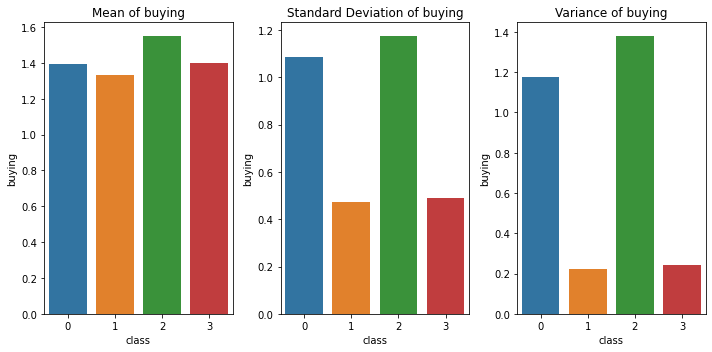

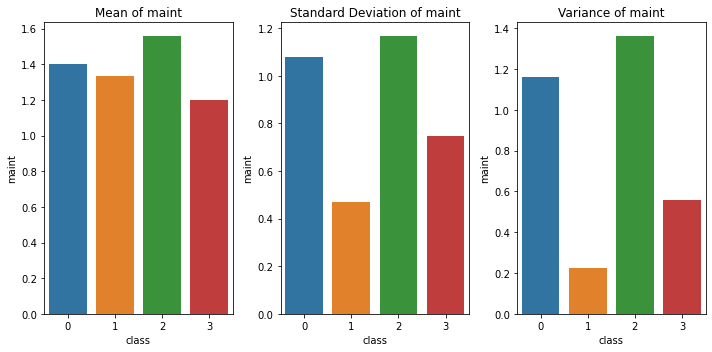

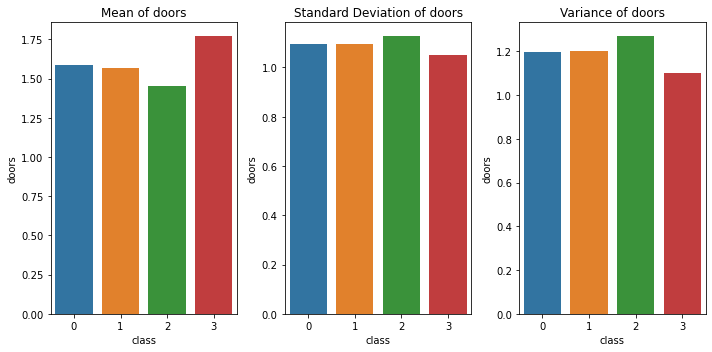

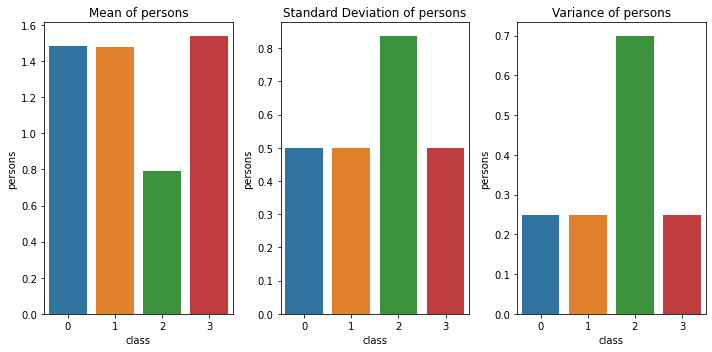

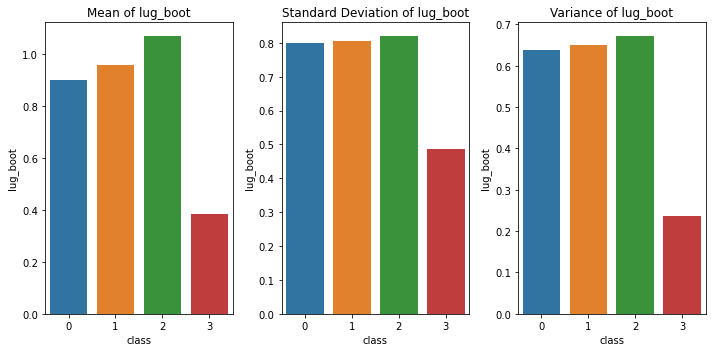

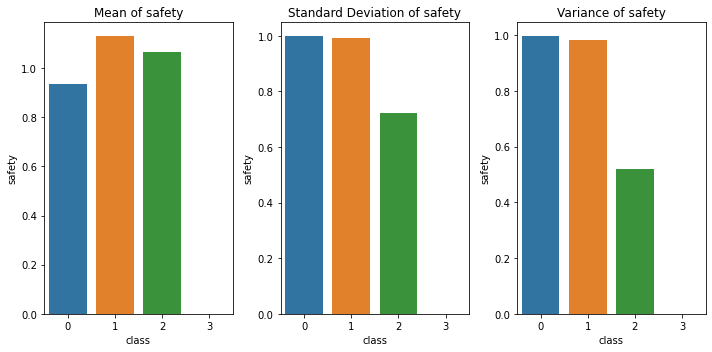

In [33]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

for col in col_names[:-1]:  
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    sns.barplot(x=df['class'], y=df[col], data=df, estimator=np.mean, ci=None)
    plt.title(f"Mean of {col}")

    plt.subplot(1, 3, 2)
    sns.barplot(x=df['class'], y=df[col], data=df, estimator=np.std, ci=None)
    plt.title(f"Standard Deviation of {col}")

    plt.subplot(1, 3, 3)
    sns.barplot(x=df['class'], y=df[col], data=df, estimator=np.var, ci=None)
    plt.title(f"Variance of {col}")

    plt.tight_layout()
    plt.show()

#### Wnioski

Na podstawie tabeli przedstawiającej średnią, odchylenie standardowe i wariancję każdego atrybutu pogrupowanego według kolumny `class` możemy wyciągnąć następujące wnioski:

- Wartości średnie atrybutów 'buying' i 'maint' we wszystkich klasach są nieco podobne, co wskazuje, że ich wpływ na zmienną docelową nie różni się istotnie między klasami.

- Atrybut "safety" ma najwyższe odchylenie standardowe i wariancję dla klasy "acc", co sugeruje, że w tej klasie istnieje szerszy zakres wartości tego atrybutu w porównaniu z innymi.

- W przypadku klasy "vgood" atrybut "safety" ma najniższe odchylenie standardowe i wariancję, co wskazuje, że wartości tego atrybutu są bardziej spójne w ramach tej klasy. Obserwacja ta potwierdza wniosek, że wysokie oceny bezpieczeństwa są związane z lepszą akceptowalnością samochodu.

- Atrybut "persons" ma najwyższe odchylenie standardowe i wariancję dla klasy "unacc", co sugeruje, że istnieje większa zmienność tego atrybutu w przypadku samochodów nieakceptowalnych.

- Atrybut "lug_boot" ma stosunkowo niskie odchylenie standardowe i wariancję we wszystkich klasach, co sugeruje, że może nie być silnym predyktorem akceptowalności samochodu.

Podsumowując, analiza średniej, odchylenia standardowego i wariancji atrybutów w zbiorze danych Car Evaluation dostarcza pewnych spostrzeżeń na temat ich związków ze zmienną docelową. Atrybuty takie jak "safety" i "persons" wykazują różne wzorce zmienności w różnych klasach, co może być przydatne do przewidywania akceptowalności samochodu. Jednak atrybuty takie jak "lug_boot" mogą nie mieć takiego wpływu na przewidywania.

#### Outliers (elementy odstające)

In [35]:
outliers = {}
for col in col_names[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

if all(len(outliers[col]) == 0 for col in outliers):
    print("No outliers found")
else:
    print("Outliers found:")
    for col in outliers:
        if len(outliers[col]) > 0:
            print(f"{col}: {len(outliers[col])} rows")

No outliers found


#### Macierz korelacji

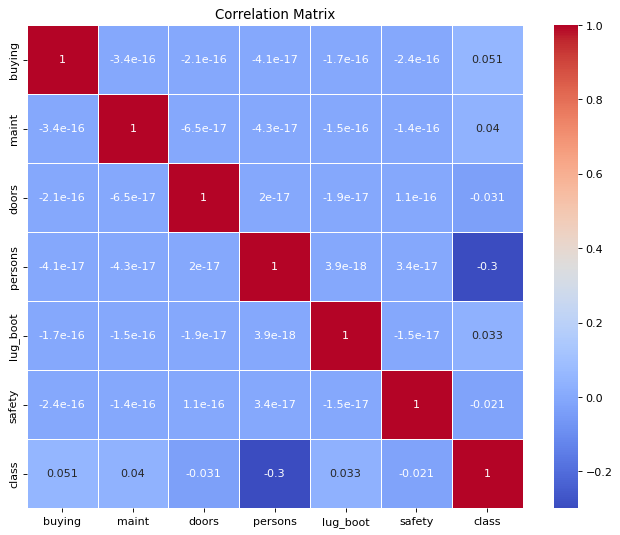

In [44]:
from matplotlib.pyplot import figure

figure(figsize=(10,8), dpi=80)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Wnioski

Pomiędzy większością atrybutów nie ma istotnych zależności, na co wskazują współczynniki korelacji bliskie zeru. Sugeruje to, że atrybuty są od siebie niezależne, co jest pożądane w przypadku modeli opartych na drzewach decyzyjnych, takich jak zastosowany w tej analizie, pomijamy oczywiście wartości '1' na diagonali.

- Atrybut `persons` ma najwyższą ujemną korelację z atrybutem `class` (-0,3). Wskazuje to, że wraz ze wzrostem liczby osób, które samochód może przewozić, jego akceptowalność ma tendencję do poprawy. Dlatego atrybut "osoby" może być ważnym predyktorem akceptowalności samochodu. Ujemna korelacja oznacza, że gdy jedna zmienna rośnie, druga zmienna maleje. W przypadku najwyższej ujemnej korelacji między atrybutem 'persons' a atrybutem 'class', oznacza to, że gdy liczba osób, które auto może pomieścić, wzrasta, wartość atrybutu 'class' (akceptowalność samochodu) generalnie maleje. Innymi słowy, im większa liczba osób, które auto może przewieźć, tym bardziej akceptowalne jest auto.

- Atrybuty `buying` i `maint` mają słabe dodatnie korelacje z atrybutem `class` (odpowiednio 0,051424 i 0,040194). Sugeruje to, że mają one ograniczony wpływ na akceptowalność samochodu.

- Atrybuty `doors`, `lug_boot` i `safety` mają bardzo słabe ujemne korelacje z atrybutem `class`, co wskazuje, że mogą nie być silnymi predyktorami akceptowalności samochodu.

Podsumowując, analiza macierzy korelacji sugeruje, że atrybut `persons` jest najważniejszym predyktorem akceptowalności samochodu spośród podanych atrybutów. Pozostałe atrybuty, w tym `buying`, `maint`, `doors`, `lug_boot` i `safety`, wykazują słabą lub zerową korelację z akceptowalnością samochodu, co oznacza, że mogą nie mieć silnego wpływu na przewidywanie zmiennej docelowej. Należy jednak pamiętać, że korelacja nie oznacza związku przyczynowego i do potwierdzenia tych obserwacji mogą być potrzebne dalsze obserwacje.

### Podział danych

In [71]:
from sklearn.preprocessing import StandardScaler

def load_preprocessed_data():
    '''
    Loads data and splits them to X and Y
    '''
    modified_data = df.drop(columns=['class'], axis=1) 
    target = df['class']
    
    return StandardScaler().fit_transform(modified_data.values), target.values - 1

In [72]:
from sklearn.model_selection import train_test_split

X, Y = load_preprocessed_data()

### Użyte Klasyfikatory 

Podział danych został rozdzielony na subset walidacyjny oraz testowy w celu porównania wartości `accuraccy` poszczególnych zaimplementowanych modeli.

Random Forest Accuracy: 0.9780 +/- 0.0043
Support Vector Classifier Accuracy: 0.9109 +/- 0.0190
K-Nearest Neighbors Accuracy: 0.9352 +/- 0.0101
Gaussian Naive Bayes Accuracy: 0.6187 +/- 0.0240
Decision Tree Accuracy: 0.9757 +/- 0.0030


Text(0.5, 1.0, 'Comparison of Classifier Accuracies on the Wine Quality Dataset')

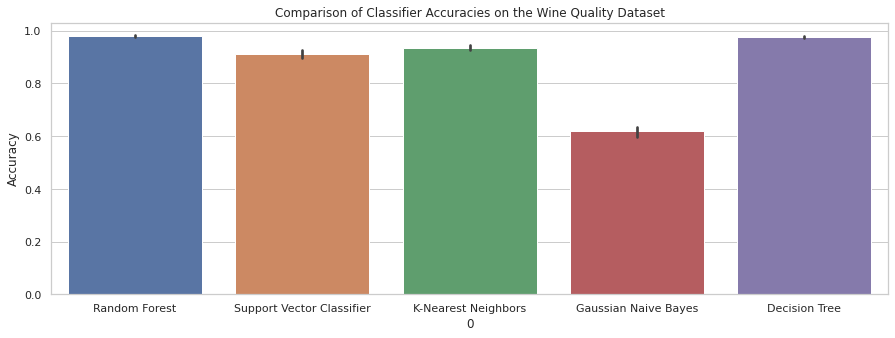

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Classifier', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

accuracies = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for name, clf in classifiers:
    accuracies.append([])
    for train_idx, val_idx in skf.split(X, Y):
        clf.fit(X[train_idx], Y[train_idx])
        Y_pred = clf.predict(X[val_idx])
        accuracy = accuracy_score(Y[val_idx], Y_pred)
        accuracies[-1].append(accuracy)
    print(f"{name} Accuracy: {np.mean(accuracies[-1]):.4f} +/- {np.std(accuracies[-1]):.4f}")

names, acc_values = zip(*classifiers)
plt.figure(figsize=(15,5))
sns.barplot(data=pd.DataFrame([(name, acc) for name, accs in zip(names, accuracies) for acc in accs]), x=0, y=1)
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies on the Wine Quality Dataset')

- Random Forest ma najwyższą dokładność 0,9780 przy niskiej wariancji 0,0043, co wskazuje, że jest to niezawodny klasyfikator dla danego zbioru danych.
- Support Vector Classifier (SVC) ma niższą dokładność 0,9109 z wyższą wariancją 0,0190, co wskazuje, że może nie być tak wiarygodny jak Random Forest dla tego zestawu danych.
- K-Nearest Neighbors (KNN) ma dokładność 0,9352 z umiarkowaną wariancją 0,0101, co sugeruje, że może być dobrą opcją, ale nie tak niezawodną jak Random Forest.
- Gaussian Naive Bayes (GNB) ma najniższą dokładność 0,6187 z wysoką wariancją 0,0240, co wskazuje, że nie jest to dobry klasyfikator dla tego zestawu danych.
- Drzewo decyzyjne ma dokładność 0,9757 z niską wariancją 0,0030, co sugeruje, że jest to wiarygodny klasyfikator dla tego zestawu danych, ale nie tak bardzo jak Random Forest.

## 3.2 Gender Classification Dataset